## FOOOFGroup

_This tutorial covers the fundamentals of the FOOOF codebase. For a more general description of the model, go [here](ModelDescription.ipynb)._

In [1]:
%matplotlib inline

from fooof import FOOOFGroup

from fooof.utils import mk_freq_vector
from fooof.synth import mk_fake_group_data

In [2]:
# Let's create a group of PSDs
#  This function will create PSDs with slope values randomly chosen from {1.5, 2.0, 2.5}
#    with oscillations potentially added, with CF of either 10 or 20 Hz.
freqs, psds = mk_fake_group_data(mk_freq_vector([3, 40], 0.5), n_psds=10)

#### FOOOFGroup

The FOOOFGroup object is basically a wrapper around FOOOF, that allows it to run across multiple PSDs.

In [3]:
# The FOOOFGroup object accepts the same 
fg = FOOOFGroup(bandwidth_limits=[1, 8], min_amp=0.05, max_n_oscs=6)


                                        FOOOF - GROUP RESULTS                                       

                                  Number of PSDs in the Group: 10                                   

                   The input PSDs were modelled in the frequency range: 3 - 40 Hz                   
                                  Frequency Resolution is 0.50 Hz                                   

                                   PSDs were fit without a knee.                                    

                                      Background Slope Values                                       
                               Min: 1.5029, Max: 2.5293, Mean: 1.8190                               

                       In total 12 oscillations were extracted from the group                       

                                        Fitting Performance                                         
                             R2s -  Min: 0.9987, Max: 1.0000, Mean: 0.9995          

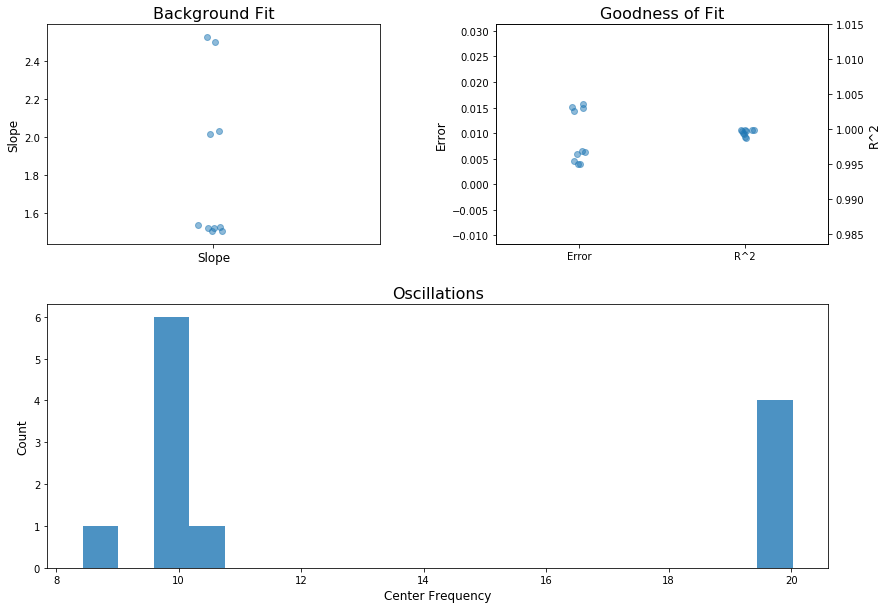

In [4]:
# Save as with the FOOOF object, you can call 'model' to runs the fitting, and print results & plots
#  In this case, the results printed will be summary data across the group of PSDs
fg.model(freqs, psds)

In [5]:
# Same as with FOOOF, this information can be saved out to a pdf with 'create_report'
fg.create_report()

In [6]:
# To run group fits, without printing results, use the 'fit_group'
#  The main difference, as compared to 'fit', is that it takes a 2D array of PSDs, in the shape [n_psds, n_freqs]
fg.fit(freqs, psds)

In [7]:
# As it runs, FOOOFGroup collects each fit results in 'group_results'
#  'group_results' is a list of FOOOFResult objects
fg.group_results[0:2]

[FOOOFResult(background_params=array([ 35.03032594,   1.5203564 ]), oscillation_params=array([[ 10.03445106,   0.48655054,   3.83193016]]), r2=0.99975473952986116, error=0.0059492737250995261, gaussian_params=array([[ 10.03445106,   0.4866292 ,   1.91596508]])),
 FOOOFResult(background_params=array([ 35.00287195,   1.50293192]), oscillation_params=array([], shape=(0, 3), dtype=float64), r2=0.99986582114948563, error=0.0039308609751878025, gaussian_params=array([], dtype=float64))]

In [8]:
# In order to parse this data, and retrieve specific results, you can use the 'get_all_data' method
#  'get_all_data' let's you grab data by specifying a FOOOFResult field and (optionally) an index
sls = fg.get_all_data('background_params', 1)
cfs = fg.get_all_data('oscillation_params', 0)

In [9]:
# Check the fit center-frequencies and slope values
print(cfs)
print(sls)

[ 10.03445106  10.10777886  19.98069185  10.11062165  19.96694296
  10.11744534  20.02785974   8.43457474  10.47743928  10.0273544
  10.10821882  20.02250904]
[ 1.5203564   1.50293192  1.50378881  2.03130218  2.52928727  1.52798852
  1.52044282  2.50147475  2.01705812  1.53558283]


In [10]:
#### Saving & Loading with FOOOFGroup

In [11]:
# Recreate some new synthetic data, and initialize a new FOOOFGroup
freqs, psds = mk_fake_group_data(mk_freq_vector([3, 40], 0.5), n_psds=25)
fg = FOOOFGroup(bandwidth_limits=[1, 8], min_amp=0.05, max_n_oscs=6)

In [12]:
# Save out data with FOOOFGroup
fg.fit(freqs, psds)
fg.save(save_results=True)

In [13]:
# You can then reload this group data
nfg = FOOOFGroup()
nfg.load()

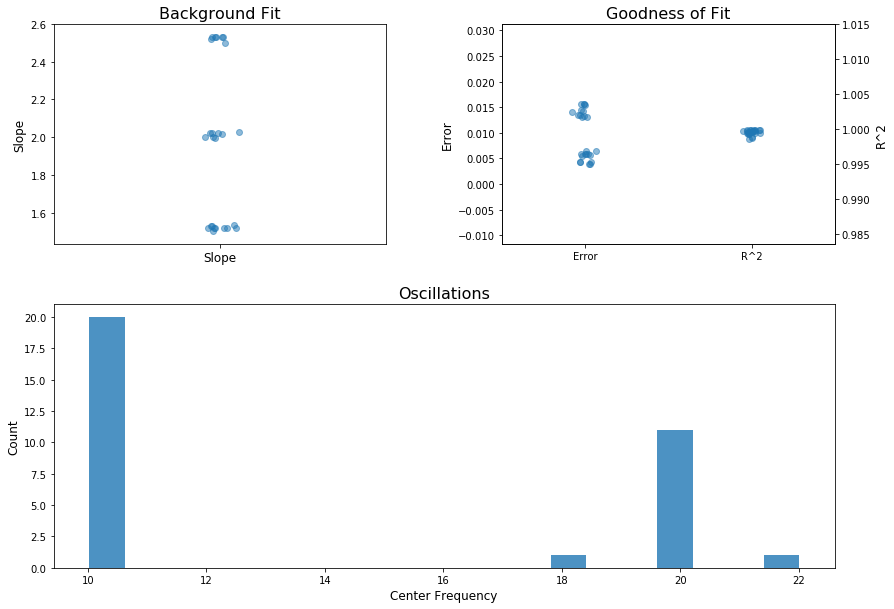

In [14]:
# Plot the reloaded data
nfg.plot()